In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! mkdir Dataset

In [ ]:
!kaggle datasets download -d kazanova/sentiment140

 90% 73.0M/80.9M [00:01<00:00, 37.9MB/s]
100% 80.9M/80.9M [00:01<00:00, 54.1MB/s]


In [ ]:
!unzip sentiment140

Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
from fastai.text import *

In [ ]:
path=Path('Dataset')

In [ ]:
path.ls()

[PosixPath('Dataset/train.csv')]

In [ ]:
df=pd.read_csv(path/'train.csv',encoding='latin-1')

In [ ]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
len(df)

1599999

In [ ]:
train_df,valid_df=df.loc[:1400000,:],df.loc[1400000:,:]

In [ ]:
len(train_df)

1400001

In [ ]:
len(valid_df)

199999

In [ ]:
data_lm=TextLMDataBunch.from_df(Path(path),train_df,valid_df,text_cols=5,bs=32)
data_clas=TextClasDataBunch.from_df(Path(path),train_df,valid_df,text_cols=5,label_cols=0,bs=32)

In [ ]:
data_clas.show_batch()

text,target
xxbos human shield à ® à ® © à¯?à ® xxunk à ® xxunk ® xxunk ® xxunk ® à ® ° xxunk à ® xxunk ® © à¯?à ® xxunk ? à ® ® à ® xxunk ® ªà ® à ® ¿à ® xxunk ® ® à¯ ? à ® xxunk ® à ® à ® à¯?à ® à ® xxunk ® ¿à ® xxunk ? ( à,0
xxbos ii xxmaj dono xxmaj ho xxmaj de xxmaj hell ii'm xxmaj ment xxmaj to xxmaj use xxmaj that o_0 iits xxmaj so xxmaj hard ? xxmaj there 's xxmaj xxunk xxmaj on xxup tv xxrep 4 & xxmaj to xxmaj bad xxmaj to xxmaj go xxmaj out xxrep 4 & ii xxmaj super xxmaj super xxmaj bored,0
xxbos ' xxmaj time xxmaj is xxmaj an xxmaj illusion and xxmaj all xxmaj time xxmaj is xxmaj now ' ... & ' xxmaj you ready to have some fun ? i thought so ... & ' xxmaj read xxmaj ariel 's full article @ http : / / tr.im / jfd7,4
"xxbos xxmaj time = xxmaj money & & xxmaj love = xxmaj pain . xxmaj so , though i 'm working a lot this week and it hurts ... i 'll be making money ! & & i love money , so it works out",4
"xxbos xxmaj in xxmaj bangkok ! ! xxmaj hot , humid and heaving with people in xxmaj xxunk san rd . xxmaj off to sort out xxmaj bus - ing up to xxmaj chiang xxmaj mai . xxup vip xxmaj class , woo !",4


In [ ]:
URLs??

In [ ]:
learn=language_model_learner(data_lm, AWD_LSTM,drop_mult=0.3)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


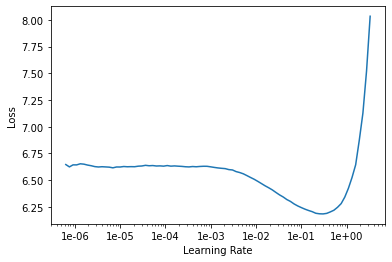

In [ ]:
learn.recorder.plot()

In [ ]:
 learn.fit_one_cycle(1,1e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.601379,4.461260,0.243774,1:35:27


In [ ]:
learn.save('stage-1')

In [ ]:
TEXT='I liked'
N_WORDS=40
N_SENTENCES=2

In [ ]:
print('\n'.join(learn.predict(TEXT,N_WORDS,temperature=0.75) for _ in range(N_SENTENCES)))

I liked it . Thank you ! xxbos You 're not getting into the Internet right now . My phone is nt working properly . xxbos i 'm really bummed i do n't have to work just xxbos
I liked it , it was & ' Does n't want to be at the end of my life xxbos IT 's so funny , and i 'm at work xxbos All my tweets are gone xxbos relaxation


In [ ]:
learn.save_encoder('twitter-sentiment-enc')

In [ ]:
learn=text_classifier_learner(data_clas,AWD_LSTM,drop_mult=0.3)
learn.load_encoder('twitter-sentiment-enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1400001 items)
x: TextList
xxbos is upset that he ca n't update his xxmaj facebook by texting it ... and might cry as a result xxmaj school today also . xxmaj blah !,xxbos @kenichan i xxunk many times for the ball . xxmaj managed to save 50 % xxmaj the rest go out of bounds,xxbos my whole body feels itchy and like its on fire,xxbos @nationwideclass no , it 's not behaving at all . i 'm mad . why am i here ? because i ca n't see you all over there .,xxbos xxunk not the whole crew
y: CategoryList
0,0,0,0,0
Path: Dataset;

Valid: LabelList (199999 items)
x: TextList
xxbos @kdaly100 ouch ... when she 's back to you in 3 months saying its still not working ...,xxbos is excited for today 's first day of summer vacation adventures - bridesmaid dress shopping , then road trip to hershey for the bears game !,xxbos xxmaj in south carolina , finally,xxbos watching manohara on extravaganza . funny . xxup lmao,xxbos xxunk at my cousins omw home 

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


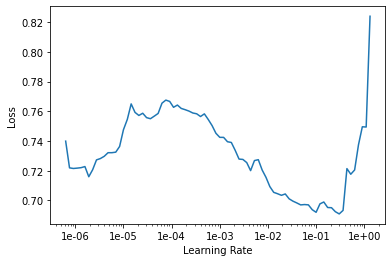

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(1,3e-3,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.538225,0.577420,0.698344,32:52


In [ ]:
learn.freeze_to(-2)
learn.fit_one_cycle(1,slice(1e-2/(2.6**4),1e-2),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.430616,0.455437,0.786399,39:01


In [ ]:
learn.save('stage-2')

In [ ]:
learn.freeze_to(-3)
learn.fit_one_cycle(1,slice(5e-3/(2.6**4),5e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.379346,0.513893,0.765384,1:05:06


In [ ]:
learn.save('stage-3')

In [ ]:
learn.load('stage-2')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1400001 items)
x: TextList
xxbos is upset that he ca n't update his xxmaj facebook by texting it ... and might cry as a result xxmaj school today also . xxmaj blah !,xxbos @kenichan i xxunk many times for the ball . xxmaj managed to save 50 % xxmaj the rest go out of bounds,xxbos my whole body feels itchy and like its on fire,xxbos @nationwideclass no , it 's not behaving at all . i 'm mad . why am i here ? because i ca n't see you all over there .,xxbos xxunk not the whole crew
y: CategoryList
0,0,0,0,0
Path: Dataset;

Valid: LabelList (199999 items)
x: TextList
xxbos @kdaly100 ouch ... when she 's back to you in 3 months saying its still not working ...,xxbos is excited for today 's first day of summer vacation adventures - bridesmaid dress shopping , then road trip to hershey for the bears game !,xxbos xxmaj in south carolina , finally,xxbos watching manohara on extravaganza . funny . xxup lmao,xxbos xxunk at my cousins omw home 

In [ ]:
learn.predict('Hey lets go on a trip i want to have a lot of fun with you friends')

(Category tensor(1), tensor(1), tensor([0.2535, 0.7465]))

In [ ]:
learn.load('stage-3')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (1400001 items)
x: TextList
xxbos is upset that he ca n't update his xxmaj facebook by texting it ... and might cry as a result xxmaj school today also . xxmaj blah !,xxbos @kenichan i xxunk many times for the ball . xxmaj managed to save 50 % xxmaj the rest go out of bounds,xxbos my whole body feels itchy and like its on fire,xxbos @nationwideclass no , it 's not behaving at all . i 'm mad . why am i here ? because i ca n't see you all over there .,xxbos xxunk not the whole crew
y: CategoryList
0,0,0,0,0
Path: Dataset;

Valid: LabelList (199999 items)
x: TextList
xxbos @kdaly100 ouch ... when she 's back to you in 3 months saying its still not working ...,xxbos is excited for today 's first day of summer vacation adventures - bridesmaid dress shopping , then road trip to hershey for the bears game !,xxbos xxmaj in south carolina , finally,xxbos watching manohara on extravaganza . funny . xxup lmao,xxbos xxunk at my cousins omw home 

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(2,slice(1e-3/(2.6**4),1e-3),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


Buffered data was truncated after reaching the output size limit.